In [1]:

import pybliometrics

pybliometrics.scopus.init()

## Extraccion API SCOPUS

In [2]:
from pybliometrics.scopus import ScopusSearch
import pandas as pd

# Query for sentiment analysis, machine learning, and social media papers after 2020
query = '''TITLE-ABS-KEY("sentiment analysis" AND "machine learning" AND "social media") AND PUBYEAR > 2020'''

# Perform Scopus search
r = ScopusSearch(query) 

# Convert results to DataFrame
rDF = pd.DataFrame(r.results)

# Save DataFrame to CSV
rDF.to_csv('scopus_papers.csv', index=False)

print(f"CSV file saved with {len(rDF)} papers")

CSV file saved with 2411 papers


In [3]:
print(rDF.shape)

(2411, 36)


In [4]:
rDF.head()

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,pageRange,description,authkeywords,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,2-s2.0-85208915346,10.1016/j.eswa.2024.125717,S0957417424025843,None,Anticipating impression using textual sentimen...,re,Review,Karim A.,60037241;60018986;60012981,The Islamia University of Bahawalpur;Hallym Un...,...,None,Twitter sentiment analysis is a natural langua...,Ensemble learning | Machine learning | Sentime...,0,1,None,None,NRF,2022R1A5A8019303,National Research Foundation of Korea
1,2-s2.0-85209885510,10.11591/ijece.v15i1.pp755-766,None,None,An improved reptile search algorithm-based mac...,ar,Article,Sureja N.,60077969;130371316,Babaria Institute of Technology;Drs. Kiran and...,...,755-766,The rapid growth of mobile technologies has tr...,Deep learning | Machine learning | Reinforceme...,0,1,None,None,None,undefined,None
2,2-s2.0-85206539690,10.1016/j.neucom.2024.128705,S0925231224014760,None,Enhancing aspect-based sentiment analysis with...,ar,Article,Huang D.,60020620,Chongqing University of Posts and Telecommunic...,...,None,Aspect-based sentiment analysis (ABSA) is a so...,Adversarial training | Aspect-based sentiment ...,0,0,None,None,None,CSTB2023TIAD-STX0031,None
3,2-s2.0-85209232540,10.1016/j.frl.2024.106487,S1544612324015162,None,Intelligent forecasting in bitcoin markets,ar,Article,Cohen G.,60080487,Western Galilee College,...,None,This paper examines the effectiveness of Artif...,AI | Bitcoin | Machine learning | Random forest,0,0,None,None,None,undefined,None
4,2-s2.0-85209190111,10.1201/9781003561651-42,None,None,Machine learning-based emotional identificatio...,cp,Conference Paper,Chug A.,60094571,Lovely Professional University,...,295-301,The method of sentiment analysis is employed t...,Convolutional Neural Network | Deep Learning |...,0,0,None,None,None,undefined,None


## Extraccion datos API SCOPUS con libreria Pybliometrics con el parametro ABSTRACT

In [5]:
from pybliometrics.scopus import ScopusSearch, AbstractRetrieval
import pandas as pd

# Query for sentiment analysis, machine learning, and social media papers after 2020
query = '''TITLE-ABS-KEY("sentiment analysis" AND "machine learning" AND "social media") AND PUBYEAR > 2020'''

# Perform Scopus search

scopus_search = ScopusSearch(query, max_entries=50)  # Limita a 50 resultados

# Convert ScopusSearch results to DataFrame
search_df = pd.DataFrame(scopus_search.results)

# List to store extended data from AbstractRetrieval
abstracts_data = []

# Extract additional details using AbstractRetrieval for each EID
for eid in search_df['eid']:
    try:
        abstract = AbstractRetrieval(eid)
        abstracts_data.append({
            'eid': eid,
            'title': abstract.title,
            'doi': abstract.doi,
            'authors': [author.indexed_name for author in abstract.authors] if abstract.authors else None,
            'affiliations': [author.affiliation for author in abstract.authors] if abstract.authors else None,
            'citedby_count': abstract.citedby_count,
            'references_count': len(abstract.references) if abstract.references else 0,
            'keywords': abstract.authkeywords,
            'idxterms': abstract.idxterms,
            'publisher': abstract.publisher,
            'copyright': abstract.copyright,
            'abstract': abstract.abstract,
            'scopus_link': abstract.scopus_link
        })
    except Exception as e:
        print(f"Error retrieving Abstract for EID {eid}: {e}")

# Convert abstracts data to DataFrame
abstracts_df = pd.DataFrame(abstracts_data)

# Merge with initial search results
full_df = pd.merge(search_df, abstracts_df, on='eid', how='inner')

# Save full data to CSV
full_df.to_csv('scopus_detailed_papers.csv', index=False)

print(f"CSV file saved with {len(full_df)} papers and extended details")


CSV file saved with 2411 papers and extended details


In [6]:
ruta_csv = 'scopus_detailed_papers.csv'
df = pd.read_csv(ruta_csv)

# Obtener el número de variables (columnas)
num_variables = df.shape[1]

print(f"El DataFrame tiene {num_variables} variables (columnas).")



El DataFrame tiene 48 variables (columnas).


In [7]:
df.head()

,eid,doi_x,pii,pubmed_id,title_x,subtype,subtypeDescription,creator,afid,affilname,...,authors,affiliations,citedby_count_y,references_count,keywords,idxterms,publisher,copyright,abstract,scopus_link
0,2-s2.0-85208915346,10.1016/j.eswa.2024.125717,S0957417424025843,NaN,Anticipating impression using textual sentimen...,re,Review,Karim A.,60037241;60018986;60012981,The Islamia University of Bahawalpur;Hallym Un...,...,"['Karim A.', 'Mansab M.', 'Shahroz M.', 'Musht...","['60018986', '60037241', '60037241', '60037241...",0,0,NaN,NaN,Elsevier Ltd,NaN,NaN,https://www.scopus.com/inward/record.uri?partn...
1,2-s2.0-85209885510,10.11591/ijece.v15i1.pp755-766,NaN,NaN,An improved reptile search algorithm-based mac...,ar,Article,Sureja N.,60077969;130371316,Babaria Institute of Technology;Drs. Kiran and...,...,"['Sureja N.', 'Chaudhari N.M.', 'Bhatt J.', 'D...","['130371316', '130371316', '130371316', '13037...",0,0,NaN,NaN,Institute of Advanced Engineering and Science,NaN,NaN,https://www.scopus.com/inward/record.uri?partn...
2,2-s2.0-85206539690,10.1016/j.neucom.2024.128705,S0925231224014760,NaN,Enhancing aspect-based sentiment analysis with...,ar,Article,Huang D.,60020620,Chongqing University of Posts and Telecommunic...,...,"['Huang D.', 'Ren L.', 'Li Z.']","['60020620', '60020620', '60020620']",0,0,NaN,NaN,Elsevier B.V.,NaN,NaN,https://www.scopus.com/inward/record.uri?partn...
3,2-s2.0-85209232540,10.1016/j.frl.2024.106487,S1544612324015162,NaN,Intelligent forecasting in bitcoin markets,ar,Article,Cohen G.,60080487,Western Galilee College,...,"['Cohen G.', 'Aiche A.']","['60080487', '60080487']",0,0,NaN,NaN,Elsevier Ltd,NaN,NaN,https://www.scopus.com/inward/record.uri?partn...
4,2-s2.0-85209190111,10.1201/9781003561651-42,NaN,NaN,Machine learning-based emotional identificatio...,cp,Conference Paper,Chug A.,60094571,Lovely Professional University,...,"['Chug A.', 'Sudeep S.', 'Kumar P.A.', 'Sharma...","['60094571', '60094571', '60094571', '60094571...",0,0,NaN,NaN,CRC Press/Balkemahttp://Pub.NL@taylorandfranci...,NaN,NaN,https://www.scopus.com/inward/record.uri?partn...


In [8]:
# Listar los nombres de las columnas
print("Columnas:", df.columns.tolist())

Columnas: ['eid', 'doi_x', 'pii', 'pubmed_id', 'title_x', 'subtype', 'subtypeDescription', 'creator', 'afid', 'affilname', 'affiliation_city', 'affiliation_country', 'author_count', 'author_names', 'author_ids', 'author_afids', 'coverDate', 'coverDisplayDate', 'publicationName', 'issn', 'source_id', 'eIssn', 'aggregationType', 'volume', 'issueIdentifier', 'article_number', 'pageRange', 'description', 'authkeywords', 'citedby_count_x', 'openaccess', 'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor', 'title_y', 'doi_y', 'authors', 'affiliations', 'citedby_count_y', 'references_count', 'keywords', 'idxterms', 'publisher', 'copyright', 'abstract', 'scopus_link']


### Extraccion de las referencias y citas


In [9]:
import pandas as pd
import requests
import csv

def fetch_citations_and_references(doi, pubmed_id):
    if doi:
        url = f"https://api.semanticscholar.org/graph/v1/paper/DOI:{doi}?fields=citations.externalIds,references.externalIds"
    elif pubmed_id:
        url = f"https://api.semanticscholar.org/graph/v1/paper/PMID:{pubmed_id}?fields=citations.externalIds,references.externalIds"
    else:
        return [], []

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        citations = [(c.get('paperId', ''), c.get('externalIds', {}).get('DOI', '')) for c in data.get('citations', []) if c.get('externalIds')]
        references = [(r.get('paperId', ''), r.get('externalIds', {}).get('DOI', '')) for r in data.get('references', []) if r.get('externalIds')]
        return citations, references
    else:
        print(f"Failed to fetch data for DOI {doi} / PubMed ID {pubmed_id}: ", response.status_code)
        return [], []

def init_csv(filename, headers):
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(headers)  # Header row

def save_to_csv(data, filename, header, mode='w'):
    with open(filename, mode=mode, newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        if mode == 'w':
            writer.writerow(['DOI', header, 'Paper DOI'])  # Header row only for new file
        for doi, papers in data.items():
            for paper_id, paper_doi in papers:
                writer.writerow([doi, paper_id, paper_doi])

def main():
    # Cargar el DataFrame
    ruta_csv = 'scopus_detailed_papers.csv'
    df = pd.read_csv(ruta_csv)
    print("Columnas del DataFrame:", df.columns.tolist())

    # Extraer las columnas relevantes
    articles = df[['title_x', 'doi_x', 'pubmed_id']].values.tolist()

    citations_filename = 'citations.csv'
    references_filename = 'references.csv'

    # Inicializar archivos CSV
    init_csv(citations_filename, ['DOI', 'Citing Paper ID', 'Paper DOI'])
    init_csv(references_filename, ['DOI', 'Cited Paper ID', 'Paper DOI'])

    for Title, DOI, PubMed_ID in articles:
        print(f"Fetching data for {Title}...")
        citations, references = fetch_citations_and_references(DOI, PubMed_ID)
        save_to_csv({DOI or PubMed_ID: citations}, citations_filename, 'Citing Paper ID', mode='a')
        save_to_csv({DOI or PubMed_ID: references}, references_filename, 'Cited Paper ID', mode='a')

if __name__ == "__main__":
    main()



Columnas del DataFrame: ['eid', 'doi_x', 'pii', 'pubmed_id', 'title_x', 'subtype', 'subtypeDescription', 'creator', 'afid', 'affilname', 'affiliation_city', 'affiliation_country', 'author_count', 'author_names', 'author_ids', 'author_afids', 'coverDate', 'coverDisplayDate', 'publicationName', 'issn', 'source_id', 'eIssn', 'aggregationType', 'volume', 'issueIdentifier', 'article_number', 'pageRange', 'description', 'authkeywords', 'citedby_count_x', 'openaccess', 'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor', 'title_y', 'doi_y', 'authors', 'affiliations', 'citedby_count_y', 'references_count', 'keywords', 'idxterms', 'publisher', 'copyright', 'abstract', 'scopus_link']
Fetching data for Anticipating impression using textual sentiment based on ensemble LRD model...
Fetching data for An improved reptile search algorithm-based machine learning for sentiment analysis...
Fetching data for Enhancing aspect-based sentiment analysis with linking words-guided emotional a

KeyboardInterrupt: 

In [9]:
df_reference = pd.read_csv('references.csv')
print("Columnas:",df_reference.columns.tolist())

Columnas: ['DOI', 'Cited Paper ID', 'Paper DOI']


In [ ]:
df['author_ids'].head()

0    57833560900;59409153600;57216637396;5602635930...
1    57218869418;57224609919;59312067500;5719267993...
2                  57189025893;59369487800;59369178200
3                              57206355677;56183436300
4    59412439400;59412439500;59412439600;5941233360...
Name: author_ids, dtype: object

In [17]:
df['author_names'].head()

0    Karim, Abdul;Mansab, Maria;Shahroz, Mobeen;Mus...
1    Sureja, Nitesh;Chaudhari, Nandini M.;Bhatt, Ja...
2                 Huang, Deling;Ren, Ling;Li, Zanxiong
3                            Cohen, Gil;Aiche, Avishay
4    Chug, Aayam;Sudeep, Sirisetti;Kumar, Polineni ...
Name: author_names, dtype: object

In [12]:
# Ver los primeros valores de la columna abstract
df['copyright'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2411 entries, 0 to 2410
Series name: copyright
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 19.0 KB


In [ ]:
# Verificar valores únicos y vacíos
print("Número de valores únicos:", df['abstract'].nunique())
print("Número de valores nulos:", df['abstract'].isnull().sum())

# Describir la longitud de los abstracts (si son textos)
df['abstract_length'] = df['abstract'].astype(str).apply(len)
print(df['abstract_length'].describe())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: abstract, dtype: float64
Número de valores únicos: 0
Número de valores nulos: 2411
count    2411.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: abstract_length, dtype: float64


In [ ]:
import pandas as pd

# Leer el archivo CSV 
ruta_csv = 'scopus_papers.csv'
df_2 = pd.read_csv(ruta_csv)

# Obtener el número de variables
num_variables = df_2.shape[1]

print(f"El DataFrame tiene {num_variables} variables (columnas).")

El DataFrame tiene 36 variables (columnas).


In [20]:
# Listar los nombres de las columnas
print("Columnas_df_2:", df_2.columns.tolist())

Columnas_df_2: ['eid', 'doi', 'pii', 'pubmed_id', 'title', 'subtype', 'subtypeDescription', 'creator', 'afid', 'affilname', 'affiliation_city', 'affiliation_country', 'author_count', 'author_names', 'author_ids', 'author_afids', 'coverDate', 'coverDisplayDate', 'publicationName', 'issn', 'source_id', 'eIssn', 'aggregationType', 'volume', 'issueIdentifier', 'article_number', 'pageRange', 'description', 'authkeywords', 'citedby_count', 'openaccess', 'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor']


## Conexion Base de Datos MySQL

In [40]:
from sqlalchemy import create_engine

# Datos de la conexión
user = "root"           
password = "root"    
host = "localhost"            
port = 3306                   
database = "Scopus" 

# Crear la conexión
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

# Verificar la conexión
try:
    with engine.connect() as connection:
        print("Conexión exitosa a la base de datos")
except Exception as e:
    print("Error al conectar:", e)


Conexión exitosa a la base de datos


### Carga de Datos con el csv extraido con el parametro ABSTRACT

In [41]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy import text

# Conexión a la base de datos
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")
Session = sessionmaker(bind=engine)
session = Session()

# Carga del DataFrame
df = pd.read_csv("scopus_detailed_papers.csv")

# Función para limpiar valores separados por ";"
def limpiar_valores(valor):
    """Devuelve una lista de valores limpios, separados por ';'."""
    if pd.notna(valor):
        return [v.strip() for v in str(valor).split(";") if v.strip()]
    return []

# Función para cargar la tabla `country`
def cargar_country(df):
    unique_countries = df["affiliation_country"].dropna().str.split(";").explode().unique()
    for country in unique_countries:
        session.execute(
            text("INSERT IGNORE INTO country (name) VALUES (:name)"),
            {"name": country}
        )
    session.commit()

# Función para cargar la tabla `city`
def cargar_city(df):
    unique_cities = df[["affiliation_city", "affiliation_country"]].dropna()
    for _, row in unique_cities.iterrows():
        cities = limpiar_valores(row["affiliation_city"])
        countries = limpiar_valores(row["affiliation_country"])
        for city, country in zip(cities, countries):
            country_id = session.execute(
                text("SELECT id FROM country WHERE name = :name"),
                {"name": country}
            ).fetchone()
            if country_id:
                session.execute(
                    text("INSERT IGNORE INTO city (name, country_id) VALUES (:name, :country_id)"),
                    {"name": city, "country_id": country_id[0]}
                )
    session.commit()

# Función para cargar la tabla `organization`
def cargar_organization(df):
    unique_orgs = df[["afid", "affilname", "affiliation_city"]].dropna()
    for _, row in unique_orgs.iterrows():
        orgs = limpiar_valores(row["affilname"])
        cities = limpiar_valores(row["affiliation_city"])
        afids = limpiar_valores(row["afid"])
        for afid, org, city in zip(afids, orgs, cities):
            city_id = session.execute(
                text("SELECT id FROM city WHERE name = :name"),
                {"name": city}
            ).fetchone()
            session.execute(
                text(
                    "INSERT IGNORE INTO organization (afid, affilname, city_id) VALUES (:afid, :affilname, :city_id)"
                ),
                {
                    "afid": afid,
                    "affilname": org,
                    "city_id": city_id[0] if city_id else None,
                }
            )
    session.commit()
    

# Función para cargar la tabla `person`
def cargar_person(df):
    for _, row in df.iterrows():
        authors = str(row["author_names"]).split(";")
        author_ids = str(row["author_ids"]).split(";")
        author_affils = str(row["author_afids"]).split(";")
        for author, author_id, affil in zip(authors, author_ids, author_affils):
            org_id = session.execute(
                text("SELECT afid FROM organization WHERE afid = :afid"),  # Aquí ya usas 'afid' correctamente
                {"afid": affil}
            ).fetchone()
            session.execute(
                text(
                    "INSERT IGNORE INTO person (author_id, name, organization_id) VALUES (:author_id, :name, :organization_id)"
                ),
                {
                    "author_id": author_id,
                    "name": author,
                    "organization_id": org_id[0] if org_id else None,
                }
            )
    session.commit()


# Función para cargar la tabla `concept`
def cargar_concept(df):
    unique_concepts = df["subtypeDescription"].dropna().unique()
    for concept in unique_concepts:
        session.execute(
            text("INSERT IGNORE INTO concept (label) VALUES (:label)"),
            {"label": concept}
        )
    session.commit()

# Función para cargar la tabla `periodical`
def cargar_periodical(df):
    """Carga los datos en la tabla Periodical."""
    unique_periodicals = df[["doi_x", "publicationName", "publisher"]].dropna().drop_duplicates()
    for _, row in unique_periodicals.iterrows():
        publisher_id = None
        if pd.notna(row["publisher"]):
            publisher_id_result = session.execute(
                text("SELECT afid FROM organization WHERE affilname = :affilname"),  # Cambiado 'name' por 'affilname'
                {"affilname": row["publisher"]}
            ).fetchone()
            publisher_id = publisher_id_result[0] if publisher_id_result else None

        session.execute(
            text(
                """
                INSERT IGNORE INTO periodical (identifier, name, publisher_id) 
                VALUES (:identifier, :name, :publisher_id)
                """
            ),
            {
                "identifier": row["doi_x"],
                "name": row["publicationName"],
                "publisher_id": publisher_id
            }
        )
    session.commit()


def cargar_article(df):
    """Carga la tabla Article con el manejo de concept_id derivado de subtypeDescription."""
    for _, row in df.iterrows():
        # Obtener concept_id basado en subtypeDescription
        concept_id = None
        if pd.notna(row['subtypeDescription']):
            concept = row['subtypeDescription']
            concept_id_result = session.execute(
                text("SELECT id FROM concept WHERE label = :label"),
                {"label": concept}
            ).fetchone()
            concept_id = concept_id_result[0] if concept_id_result else None
        
        # Obtener otros campos
        periodical_id = None
        if pd.notna(row['doi_x']):
            periodical_id_result = session.execute(
                text("SELECT id FROM periodical WHERE identifier = :identifier"),
                {"identifier": row['doi_x']}
            ).fetchone()
            periodical_id = periodical_id_result[0] if periodical_id_result else None

        person_id = None
        if pd.notna(row['author_ids']) and isinstance(row['author_ids'], str):
            person_id = row['author_ids'].split(';')[0]

        publisher_id = None
        if pd.notna(row['publisher']):
            publisher_id_result = session.execute(
                text("SELECT afid FROM organization WHERE affilname = :affilname"),
                {"affilname": row['publisher']}
            ).fetchone()
            publisher_id = publisher_id_result[0] if publisher_id_result else None

        # Manejo de keywords y description
        keywords = ";".join(filter(None, [str(row.get('authkeywords')) if pd.notna(row.get('authkeywords')) else None,
                                          str(row.get('keywords')) if pd.notna(row.get('keywords')) else None]))
        description = row['description'] if pd.notna(row['description']) else None

        # Inserción de datos
        session.execute(
            text(
                """
                INSERT IGNORE INTO article (
                    eid, title, description, keywords, date_published, citation_count, 
                    person_identifier, periodical_id, concept_id, publisher_id
                ) VALUES (
                    :eid, :title, :description, :keywords, :date_published, :citation_count,
                    :person_identifier, :periodical_id, :concept_id, :publisher_id
                )
                """
            ),
            {
                "eid": row["eid"],
                "title": row["title_x"],
                "description": description,
                "keywords": keywords,
                "date_published": row["coverDate"],
                "citation_count": row["citedby_count_x"] if pd.notna(row["citedby_count_x"]) else 0,
                "person_identifier": person_id,
                "periodical_id": periodical_id,
                "concept_id": concept_id,
                "publisher_id": publisher_id
            }
        )
    session.commit()


# Llamar a las funciones en orden correcto
cargar_country(df)
cargar_city(df)
cargar_organization(df)
cargar_concept(df)
cargar_person(df)
cargar_periodical(df)
cargar_article(df)

print("Carga completada.")



Carga completada.


In [ ]:
def cargar_observacion(df):
    for _, row in df.iterrows():
        # Obtener los valores de la fila
        value = row['citedby_count_x']
        observation_date = row['coverDate']
        article_id = row['eid'] 

        article_exists = session.execute(
            text("SELECT eid FROM Article WHERE eid = :article_id"),
            {"article_id": article_id}
        ).fetchone()
        
        if article_exists:
            session.execute(
                text("""
                INSERT INTO Observation (value, observation_date, article_id)
                VALUES (:value, :observation_date, :article_id)
                """),
                {"value": value, "observation_date": observation_date, "article_id": article_id}
            )
    
    # Confirmar la transacción
    session.commit()


In [13]:
cargar_observacion(df)

### Generacion RDF extrayendo los datos a partir de la base de datos generada

In [20]:
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import RDF, RDFS, XSD, SKOS
import mysql.connector
from datetime import datetime

def clean_for_uri(text):
    if not text:
        return "unknown"
    
    # Remove accents
    a, b = 'áéíóúüñÁÉÍÓÚÜÑ', 'aeiouunAEIOUUN'
    trans = str.maketrans(a, b)
    text = text.translate(trans)
    
    # Remove or replace special characters
    import re
    text = re.sub(r'[<>:"/\\|?*(){}[\].,;\']', '', text)
    text = re.sub(r'\s+', '_', text)
    text = re.sub(r'[^a-zA-Z0-9_-]', '', text)
    
    # Ensure the result is not empty
    if not text:
        return "unnamed_" + str(hash(text) % 10000)
    
    return text.lower()[:100]  # Limit length to avoid extremely long URIswer()

g = Graph()
schema = Namespace("https://schema.org/")
dbp = Namespace("http://dbpedia.org/resource/")
myv = Namespace("http://example.org/myv/")

g.bind("schema", schema)
g.bind("dbp", dbp)
g.bind("myv", myv)
g.bind("skos", SKOS)

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="Scopus"
)
cursor = db.cursor(dictionary=True)

# Add Countries
cursor.execute("SELECT * FROM Country")
for country in cursor.fetchall():
    country_uri = URIRef(dbp + clean_for_uri(country['name']))
    g.add((country_uri, RDF.type, schema.Country))
    g.add((country_uri, schema.name, Literal(country['name'])))

# Add Cities
cursor.execute("SELECT c.*, co.name as country_name FROM City c JOIN Country co ON c.country_id = co.id")
for city in cursor.fetchall():
    city_uri = URIRef(dbp + clean_for_uri(city['name']))
    country_uri = URIRef(dbp + clean_for_uri(city['country_name']))
    g.add((city_uri, RDF.type, schema.City))
    g.add((city_uri, schema.name, Literal(city['name'])))
    g.add((city_uri, schema.containsPlace, country_uri))

# Add Organizations
cursor.execute("SELECT o.*, c.name as city_name FROM Organization o LEFT JOIN City c ON o.city_id = c.id")
for org in cursor.fetchall():
    org_uri = URIRef(schema + clean_for_uri(org['affilname']))
    g.add((org_uri, RDF.type, schema.Organization))
    g.add((org_uri, schema.identifier, Literal(org['afid'])))
    g.add((org_uri, schema.name, Literal(org['affilname'])))
    if org['city_name']:
        city_uri = URIRef(dbp + clean_for_uri(org['city_name']))
        g.add((org_uri, schema.location, city_uri))

# Add Persons
cursor.execute("SELECT p.*, o.affilname FROM Person p LEFT JOIN Organization o ON p.organization_id = o.afid")
for person in cursor.fetchall():
    person_uri = URIRef(schema + clean_for_uri(person['name']))
    g.add((person_uri, RDF.type, schema.Person))
    g.add((person_uri, schema.identifier, Literal(person['author_id'])))
    g.add((person_uri, schema.name, Literal(person['name'])))
    if person['affilname']:
        org_uri = URIRef(schema + clean_for_uri(person['affilname']))
        g.add((person_uri, schema.affiliation, org_uri))

# Add Concepts
cursor.execute("SELECT * FROM Concept")
for concept in cursor.fetchall():
    concept_uri = URIRef(myv + "concept/" + str(concept['id']))
    g.add((concept_uri, RDF.type, SKOS.Concept))
    g.add((concept_uri, RDFS.label, Literal(concept['label'])))

# Add Periodicals
cursor.execute("SELECT p.*, o.affilname FROM Periodical p LEFT JOIN Organization o ON p.publisher_id = o.afid")
for periodical in cursor.fetchall():
    periodical_uri = URIRef(schema + clean_for_uri(periodical['name']))
    g.add((periodical_uri, RDF.type, schema.Periodical))
    g.add((periodical_uri, schema.identifier, Literal(periodical['identifier'])))
    g.add((periodical_uri, schema.name, Literal(periodical['name'])))
    if periodical['affilname']:
        publisher_uri = URIRef(schema + clean_for_uri(periodical['affilname']))
        g.add((periodical_uri, schema.publisher, publisher_uri))

# Add Articles and Observations
cursor.execute("""
    SELECT a.*, p.name as person_name, c.label as concept_label, 
           o.value as obs_value, o.observation_date 
    FROM Article a 
    LEFT JOIN Person p ON a.person_identifier = p.author_id
    LEFT JOIN Concept c ON a.concept_id = c.id
    LEFT JOIN Observation o ON o.article_id = a.eid
""")
for article in cursor.fetchall():
    article_uri = URIRef(schema + clean_for_uri(article['title']))
    g.add((article_uri, RDF.type, schema.Article))
    g.add((article_uri, schema.identifier, Literal(article['eid'])))
    g.add((article_uri, schema.title, Literal(article['title'])))
    if article['description']:
        g.add((article_uri, schema.description, Literal(article['description'])))
    if article['keywords']:
        g.add((article_uri, schema.keywords, Literal(article['keywords'])))
    if article['date_published']:
        g.add((article_uri, schema.datePublished, 
               Literal(article['date_published'], datatype=XSD.date)))
    
    # Add citation observation
    if article['obs_value'] and article['observation_date']:
        obs_uri = URIRef(myv + "observation/" + article['eid'])
        g.add((obs_uri, RDF.type, schema.Observation))
        g.add((obs_uri, schema.value, Literal(article['obs_value'])))
        g.add((obs_uri, schema.observationDate, 
               Literal(article['observation_date'], datatype=XSD.date)))
        g.add((article_uri, myv.citationCount, obs_uri))

cursor.close()
db.close()

g.serialize("scopus_data.ttl", format="turtle")

<Graph identifier=Nc5c29b99d6404322a53d709e6d04aa58 (<class 'rdflib.graph.Graph'>)>

In [11]:
import pandas as pd

# Leer los archivos CSV
citations_df = pd.read_csv('citations.csv')
datos_con_referencias_df = pd.read_csv('datos_con_referencias.csv')
scopus_papers_df = pd.read_csv('scopus_papers.csv')

# Mostrar las primeras filas de cada DataFrame para entender su estructura
print("Citations DataFrame:")
print(citations_df.head())

print("\nDatos con Referencias DataFrame:")
print(datos_con_referencias_df.head())

print("\nScopus Papers DataFrame:")
print(scopus_papers_df.head())

Citations DataFrame:
                           DOI                           Citing Paper ID  \
0    10.37934/araset.43.1.5465  0c49f105a4d485d892233254b35edf4b1b625216   
1   10.1038/s41598-024-76079-5  6f6169cff083864513712524a33d035fd3053d20   
2  10.1016/j.rcsop.2024.100521  d6ae1c8605678d28dddeb437db91ca699aee0d27   
3   10.1007/s42001-024-00326-y  3afab6e9d6a07b36cf164ec2eaf8fd58bd76e9ed   
4   10.1007/s42001-024-00326-y  13dce34e597626a2fb6e014116345bd1a2f6d443   

                       Paper DOI  
0  10.21111/aliktisab.v8i2.12838  
1     10.1038/s41598-025-85392-6  
2   10.1016/j.lansea.2024.100517  
3     10.12928/channel.v12i2.964  
4         10.62754/joe.v3i5.3912  

Datos con Referencias DataFrame:
                  eid                           doi_x                pii  \
0  2-s2.0-85208915346      10.1016/j.eswa.2024.125717  S0957417424025843   
1  2-s2.0-85209885510  10.11591/ijece.v15i1.pp755-766                NaN   
2  2-s2.0-85206539690    10.1016/j.neucom.2024.128

### Ultimo modelo de clases RDF


In [19]:
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import RDF, RDFS, XSD, SKOS
import pandas as pd
import re

# Helper function to clean and format strings for URIs
def clean_for_uri(text):
    if not text:
        return "unknown"
    a, b = 'áéíóúüñÁÉÍÓÚÜÑ', 'aeiouunAEIOUUN'
    trans = str.maketrans(a, b)
    text = text.translate(trans)
    text = re.sub(r'[<>:"/\\|?*(){}[\].,;\']', '', text)
    text = re.sub(r'\s+', '_', text)
    text = re.sub(r'[^a-zA-Z0-9_-]', '', text)
    return text.lower()[:100]

# Namespaces
g = Graph()
schema = Namespace("https://schema.org/")
dbp = Namespace("http://dbpedia.org/resource/")
myv = Namespace("http://example.org/myv/")
skos = SKOS

g.bind("schema", schema)
g.bind("dbp", dbp)
g.bind("myv", myv)
g.bind("skos", skos)

# Load CSVs
citations_df = pd.read_csv('citations.csv')
datos_con_referencias_df = pd.read_csv('datos_con_referencias.csv')
scopus_papers_df = pd.read_csv('scopus_papers.csv')

# Add Countries
countries = scopus_papers_df['affiliation_country'].dropna().unique()
for country in countries:
    country_uri = URIRef(dbp + clean_for_uri(country))
    g.add((country_uri, RDF.type, schema.Country))
    g.add((country_uri, schema.name, Literal(country)))

# Add Cities
cities = scopus_papers_df[['affiliation_city', 'affiliation_country']].dropna().drop_duplicates()
for _, row in cities.iterrows():
    city_uri = URIRef(dbp + clean_for_uri(row['affiliation_city']))
    country_uri = URIRef(dbp + clean_for_uri(row['affiliation_country']))
    g.add((city_uri, RDF.type, schema.City))
    g.add((city_uri, schema.name, Literal(row['affiliation_city'])))
    g.add((city_uri, schema.containsPlace, country_uri))

# Add Organizations
organizations = scopus_papers_df[['affilname', 'affiliation_city']].dropna().drop_duplicates()
for _, row in organizations.iterrows():
    org_uri = URIRef(schema + clean_for_uri(row['affilname']))
    g.add((org_uri, RDF.type, schema.Organization))
    g.add((org_uri, schema.name, Literal(row['affilname'])))
    if not pd.isna(row['affiliation_city']):
        city_uri = URIRef(dbp + clean_for_uri(row['affiliation_city']))
        g.add((org_uri, schema.location, city_uri))

# Add Persons
persons = datos_con_referencias_df[['creator', 'affilname']].dropna()
for _, row in persons.iterrows():
    person_uri = URIRef(schema + clean_for_uri(row['creator']))
    g.add((person_uri, RDF.type, schema.Person))
    g.add((person_uri, schema.name, Literal(row['creator'])))
    if not pd.isna(row['affilname']):
        org_uri = URIRef(schema + clean_for_uri(row['affilname']))
        g.add((person_uri, schema.affiliation, org_uri))

# Add Concepts (simulated from keywords)
keywords = scopus_papers_df['authkeywords'].dropna().str.split(';').explode().drop_duplicates()
for keyword in keywords:
    concept_uri = URIRef(myv + "concept/" + clean_for_uri(keyword))
    g.add((concept_uri, RDF.type, SKOS.Concept))
    g.add((concept_uri, RDFS.label, Literal(keyword)))


# Add Periodicals
if 'publicationName' in scopus_papers_df.columns and 'fund_sponsor' in scopus_papers_df.columns:
    periodicals = scopus_papers_df[['publicationName', 'fund_sponsor']].drop_duplicates()
    for _, row in periodicals.iterrows():
        periodical_uri = URIRef(schema + clean_for_uri(row['publicationName']))
        g.add((periodical_uri, RDF.type, schema.Periodical))
        g.add((periodical_uri, schema.name, Literal(row['publicationName'])))
        if not pd.isna(row['fund_sponsor']):
            g.add((periodical_uri, schema.publisher, Literal(row['fund_sponsor'])))
else:
    print("Required columns 'publicationName' or 'fund_sponsor' not found in scopus_papers_df.")


# Add Articles with isPartOf relation
for _, row in scopus_papers_df.iterrows():
    if pd.isna(row['doi']):
        continue
    article_uri = URIRef(schema + clean_for_uri(row['doi']))
    g.add((article_uri, RDF.type, schema.Article))
    g.add((article_uri, schema.identifier, Literal(row['doi'])))
    g.add((article_uri, schema.title, Literal(row['title'])))
    if not pd.isna(row['publicationName']):
        periodical_uri = URIRef(schema + clean_for_uri(row['publicationName']))
        g.add((article_uri, schema.isPartOf, periodical_uri))

# Add Articles
for _, row in scopus_papers_df.iterrows():
    if pd.isna(row['doi']):
        continue
    article_uri = URIRef(schema + clean_for_uri(row['doi']))
    g.add((article_uri, RDF.type, schema.Article))
    g.add((article_uri, schema.identifier, Literal(row['doi'])))
    g.add((article_uri, schema.title, Literal(row['title'])))
    if not pd.isna(row['description']):
        g.add((article_uri, schema.description, Literal(row['description'])))
    if not pd.isna(row['authkeywords']):
        g.add((article_uri, schema.keywords, Literal(row['authkeywords'])))
    if not pd.isna(row['coverDate']):
        g.add((article_uri, schema.datePublished, Literal(row['coverDate'], datatype=XSD.date)))
    if not pd.isna(row['citedby_count']):
        g.add((article_uri, myv.citationCount, Literal(row['citedby_count'], datatype=XSD.integer)))

# Add Articles and their Authors
for _, row in scopus_papers_df.iterrows():
    if pd.isna(row['doi']):
        continue
    article_uri = URIRef(schema + clean_for_uri(row['doi']))
    g.add((article_uri, RDF.type, schema.Article))
    g.add((article_uri, schema.identifier, Literal(row['doi'])))
    g.add((article_uri, schema.title, Literal(row['title'])))
    if not pd.isna(row['description']):
        g.add((article_uri, schema.description, Literal(row['description'])))
    if not pd.isna(row['authkeywords']):
        g.add((article_uri, schema.keywords, Literal(row['authkeywords'])))
    if not pd.isna(row['coverDate']):
        g.add((article_uri, schema.datePublished, Literal(row['coverDate'], datatype=XSD.date)))
    if not pd.isna(row['citedby_count']):
        g.add((article_uri, myv.citationCount, Literal(row['citedby_count'], datatype=XSD.integer)))

    # Add authors of the article
    if not pd.isna(row['author_names']):
        authors = row['author_names'].split(';')
        for author_name in authors:
            author_uri = URIRef(schema + clean_for_uri(author_name))
            g.add((author_uri, RDF.type, schema.Person))
            g.add((author_uri, schema.name, Literal(author_name)))
            g.add((article_uri, schema.author, author_uri))

        

# Add References
for _, row in citations_df.iterrows():
    if pd.isna(row['DOI']) or pd.isna(row['Paper DOI']):
        continue
    source_uri = URIRef(schema + clean_for_uri(row['DOI']))
    target_uri = URIRef(schema + clean_for_uri(row['Paper DOI']))
    g.add((source_uri, schema.citation, target_uri))

# Serialize RDF to Turtle format
g.serialize("articles_data_3.ttl", format="turtle")

<Graph identifier=Na68acc2c8aad43859dec2f8961aa9655 (<class 'rdflib.graph.Graph'>)>

In [5]:
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import RDF, RDFS, XSD, SKOS
import pandas as pd
import re

# Helper function to clean and format strings for URIs
def clean_for_uri(text):
    if not text:
        return "unknown"
    a, b = 'áéíóúüñÁÉÍÓÚÜÑ', 'aeiouunAEIOUUN'
    trans = str.maketrans(a, b)
    text = text.translate(trans)
    text = re.sub(r'[<>:"/\\|?*(){}[\].,;\']', '', text)
    text = re.sub(r'\s+', '_', text)
    text = re.sub(r'[^a-zA-Z0-9_-]', '', text)
    return text.lower()[:100]

# Namespaces
g = Graph()
schema = Namespace("https://schema.org/")
dbp = Namespace("http://dbpedia.org/resource/")
myv = Namespace("http://example.org/myv/")
skos = SKOS

g.bind("schema", schema)
g.bind("dbp", dbp)
g.bind("myv", myv)
g.bind("skos", skos)

# Load CSVs
citations_df = pd.read_csv('citations.csv')
datos_con_referencias_df = pd.read_csv('datos_con_referencias.csv')
scopus_papers_df = pd.read_csv('scopus_papers.csv')

# Add Countries
countries = scopus_papers_df['affiliation_country'].dropna().unique()
for country in countries:
    country_uri = URIRef(dbp + clean_for_uri(country))
    g.add((country_uri, RDF.type, schema.Country))
    g.add((country_uri, schema.name, Literal(country)))

# Add Cities
cities = scopus_papers_df[['affiliation_city', 'affiliation_country']].dropna().drop_duplicates()
for _, row in cities.iterrows():
    city_uri = URIRef(dbp + clean_for_uri(row['affiliation_city']))
    country_uri = URIRef(dbp + clean_for_uri(row['affiliation_country']))
    g.add((city_uri, RDF.type, schema.City))
    g.add((city_uri, schema.name, Literal(row['affiliation_city'])))
    g.add((city_uri, schema.containsPlace, country_uri))

# Add Organizations
organizations = scopus_papers_df[['affilname', 'affiliation_city']].dropna().drop_duplicates()
for _, row in organizations.iterrows():
    org_uri = URIRef(schema + clean_for_uri(row['affilname']))
    g.add((org_uri, RDF.type, schema.Organization))
    g.add((org_uri, schema.name, Literal(row['affilname'])))
    if not pd.isna(row['affiliation_city']):
        city_uri = URIRef(dbp + clean_for_uri(row['affiliation_city']))
        g.add((org_uri, schema.location, city_uri))

# Add Persons and associate them with Articles
for _, row in datos_con_referencias_df.iterrows():
    if pd.isna(row['creator']) or pd.isna(row['affilname']):
        continue
    person_uri = URIRef(schema + clean_for_uri(row['creator']))
    org_uri = URIRef(schema + clean_for_uri(row['affilname']))
    g.add((person_uri, RDF.type, schema.Person))
    g.add((person_uri, schema.name, Literal(row['creator'])))
    g.add((person_uri, schema.affiliation, org_uri))

# Add Concepts (keywords)
keywords = scopus_papers_df['authkeywords'].dropna().str.split(';').explode().drop_duplicates()
for keyword in keywords:
    concept_uri = URIRef(myv + "concept/" + clean_for_uri(keyword))
    g.add((concept_uri, RDF.type, SKOS.Concept))
    g.add((concept_uri, RDFS.label, Literal(keyword)))

# Add Periodicals and associate them with Articles
if 'publicationName' in scopus_papers_df.columns:
    periodicals = scopus_papers_df[['publicationName']].drop_duplicates()
    for _, row in periodicals.iterrows():
        periodical_uri = URIRef(schema + clean_for_uri(row['publicationName']))
        g.add((periodical_uri, RDF.type, schema.Periodical))
        g.add((periodical_uri, schema.name, Literal(row['publicationName'])))

# Add Articles
for _, row in scopus_papers_df.iterrows():
    if pd.isna(row['doi']):
        continue
    article_uri = URIRef(schema + clean_for_uri(row['doi']))
    g.add((article_uri, RDF.type, schema.Article))
    g.add((article_uri, schema.identifier, Literal(row['doi'])))
    g.add((article_uri, schema.title, Literal(row['title'])))
    if not pd.isna(row['description']):
        g.add((article_uri, schema.description, Literal(row['description'])))
    if not pd.isna(row['authkeywords']):
        g.add((article_uri, schema.keywords, Literal(row['authkeywords'])))
    if not pd.isna(row['coverDate']):
        g.add((article_uri, schema.datePublished, Literal(row['coverDate'], datatype=XSD.date)))
    if not pd.isna(row['citedby_count']):
        g.add((article_uri, myv.citationCount, Literal(row['citedby_count'], datatype=XSD.integer)))
    if not pd.isna(row['affiliation_city']) and not pd.isna(row['affiliation_country']):
        city_uri = URIRef(dbp + clean_for_uri(row['affiliation_city']))
        country_uri = URIRef(dbp + clean_for_uri(row['affiliation_country']))
        g.add((article_uri, schema.location, city_uri))
        g.add((article_uri, schema.location, country_uri))  # Relación directa con el país


# Add Articles and their relationships
for _, row in scopus_papers_df.iterrows():
    if pd.isna(row['doi']):
        continue
    article_uri = URIRef(schema + clean_for_uri(row['doi']))
    g.add((article_uri, RDF.type, schema.Article))
    g.add((article_uri, schema.identifier, Literal(row['doi'])))
    g.add((article_uri, schema.title, Literal(row['title'])))
    if not pd.isna(row['description']):
        g.add((article_uri, schema.description, Literal(row['description'])))
    if not pd.isna(row['authkeywords']):
        keywords = row['authkeywords'].split(';')
        for keyword in keywords:
            concept_uri = URIRef(myv + "concept/" + clean_for_uri(keyword.strip()))
            g.add((article_uri, schema.keywords, concept_uri))
    if not pd.isna(row['coverDate']):
        g.add((article_uri, schema.datePublished, Literal(row['coverDate'], datatype=XSD.date)))
    if not pd.isna(row['citedby_count']):
        g.add((article_uri, myv.citationCount, Literal(row['citedby_count'], datatype=XSD.integer)))
    if not pd.isna(row['author_names']):
        authors = row['author_names'].split(';')
        for author_name in authors:
            author_uri = URIRef(schema + clean_for_uri(author_name.strip()))
            g.add((author_uri, RDF.type, schema.Person))
            g.add((author_uri, schema.name, Literal(author_name.strip())))
            g.add((article_uri, schema.author, author_uri))
    if not pd.isna(row['publicationName']):
        periodical_uri = URIRef(schema + clean_for_uri(row['publicationName']))
        g.add((article_uri, schema.isPartOf, periodical_uri))

# Add References
for _, row in citations_df.iterrows():
    if pd.isna(row['DOI']) or pd.isna(row['Paper DOI']):
        continue
    source_uri = URIRef(schema + clean_for_uri(row['DOI']))
    target_uri = URIRef(schema + clean_for_uri(row['Paper DOI']))
    g.add((source_uri, schema.citation, target_uri))

# Serialize RDF to Turtle format
g.serialize("articles_data_prueba_3.ttl", format="turtle")

<Graph identifier=N37377b6424b348188586c7628a804823 (<class 'rdflib.graph.Graph'>)>

In [2]:
from collections import Counter

# Contar tipos de nodos
types = Counter([str(o) for s, p, o in g.triples((None, RDF.type, None))])
print("Tipos de nodos:", types)

# Contar relaciones
predicates = Counter([str(p) for s, p, o in g])
print("Relaciones:", predicates)


Tipos de nodos: Counter({'https://schema.org/Article': 2248, 'http://www.w3.org/2004/02/skos/core#Concept': 2206, 'https://schema.org/Person': 2102, 'https://schema.org/Organization': 1843, 'https://schema.org/City': 1529, 'https://schema.org/Periodical': 1127, 'https://schema.org/Country': 630})
Relaciones: Counter({'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': 11685, 'https://schema.org/name': 7236, 'https://schema.org/affiliation': 2285, 'https://schema.org/datePublished': 2252, 'http://example.org/myv/citationCount': 2249, 'https://schema.org/title': 2249, 'https://schema.org/identifier': 2248, 'https://schema.org/description': 2244, 'http://www.w3.org/2000/01/rdf-schema#label': 2212, 'https://schema.org/keywords': 2121, 'https://schema.org/location': 1848, 'https://schema.org/containsPlace': 1535, 'https://schema.org/citation': 410})


In [13]:
print("Columns in scopus_papers_df:", scopus_papers_df.columns)


Columns in scopus_papers_df: Index(['eid', 'doi', 'pii', 'pubmed_id', 'title', 'subtype',
       'subtypeDescription', 'creator', 'afid', 'affilname',
       'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'coverDate',
       'coverDisplayDate', 'publicationName', 'issn', 'source_id', 'eIssn',
       'aggregationType', 'volume', 'issueIdentifier', 'article_number',
       'pageRange', 'description', 'authkeywords', 'citedby_count',
       'openaccess', 'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no',
       'fund_sponsor'],
      dtype='object')


### Verificación del modelo RDF en GraphDB

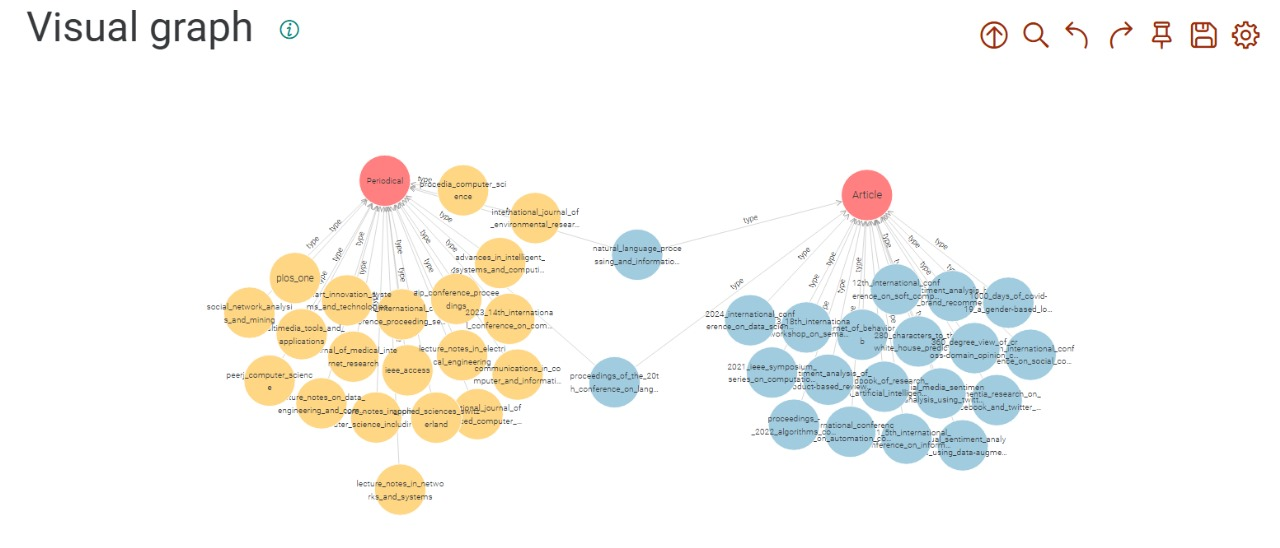

In [25]:
# Retrieve the model as the reference for transformation
from IPython.display import Image

# Specify the path to your image file
image_path = 'Graph1.jpg'

# Display the image
Image(filename=image_path,width=1000)

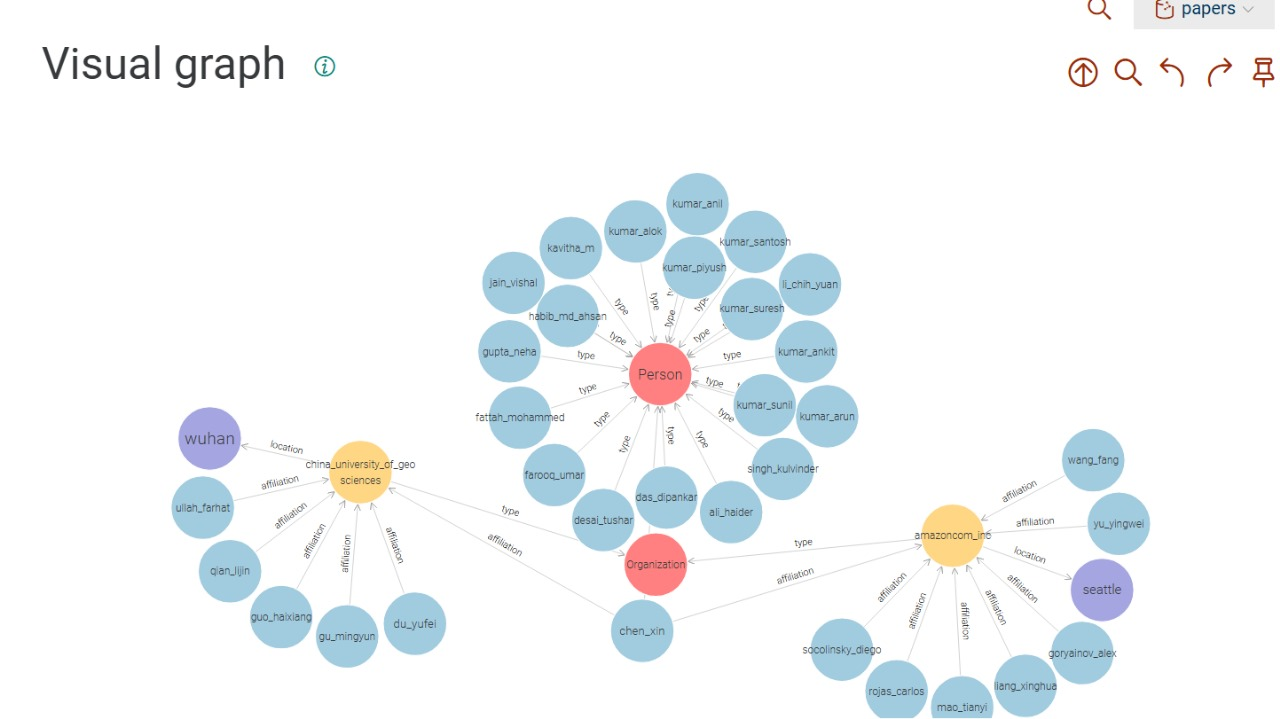

In [26]:
# Retrieve the model as the reference for transformation
from IPython.display import Image

# Specify the path to your image file
image_path = 'Graph2.jpg'

# Display the image
Image(filename=image_path,width=1000)

### Modelo de clases utilizado para la generacion del RDF

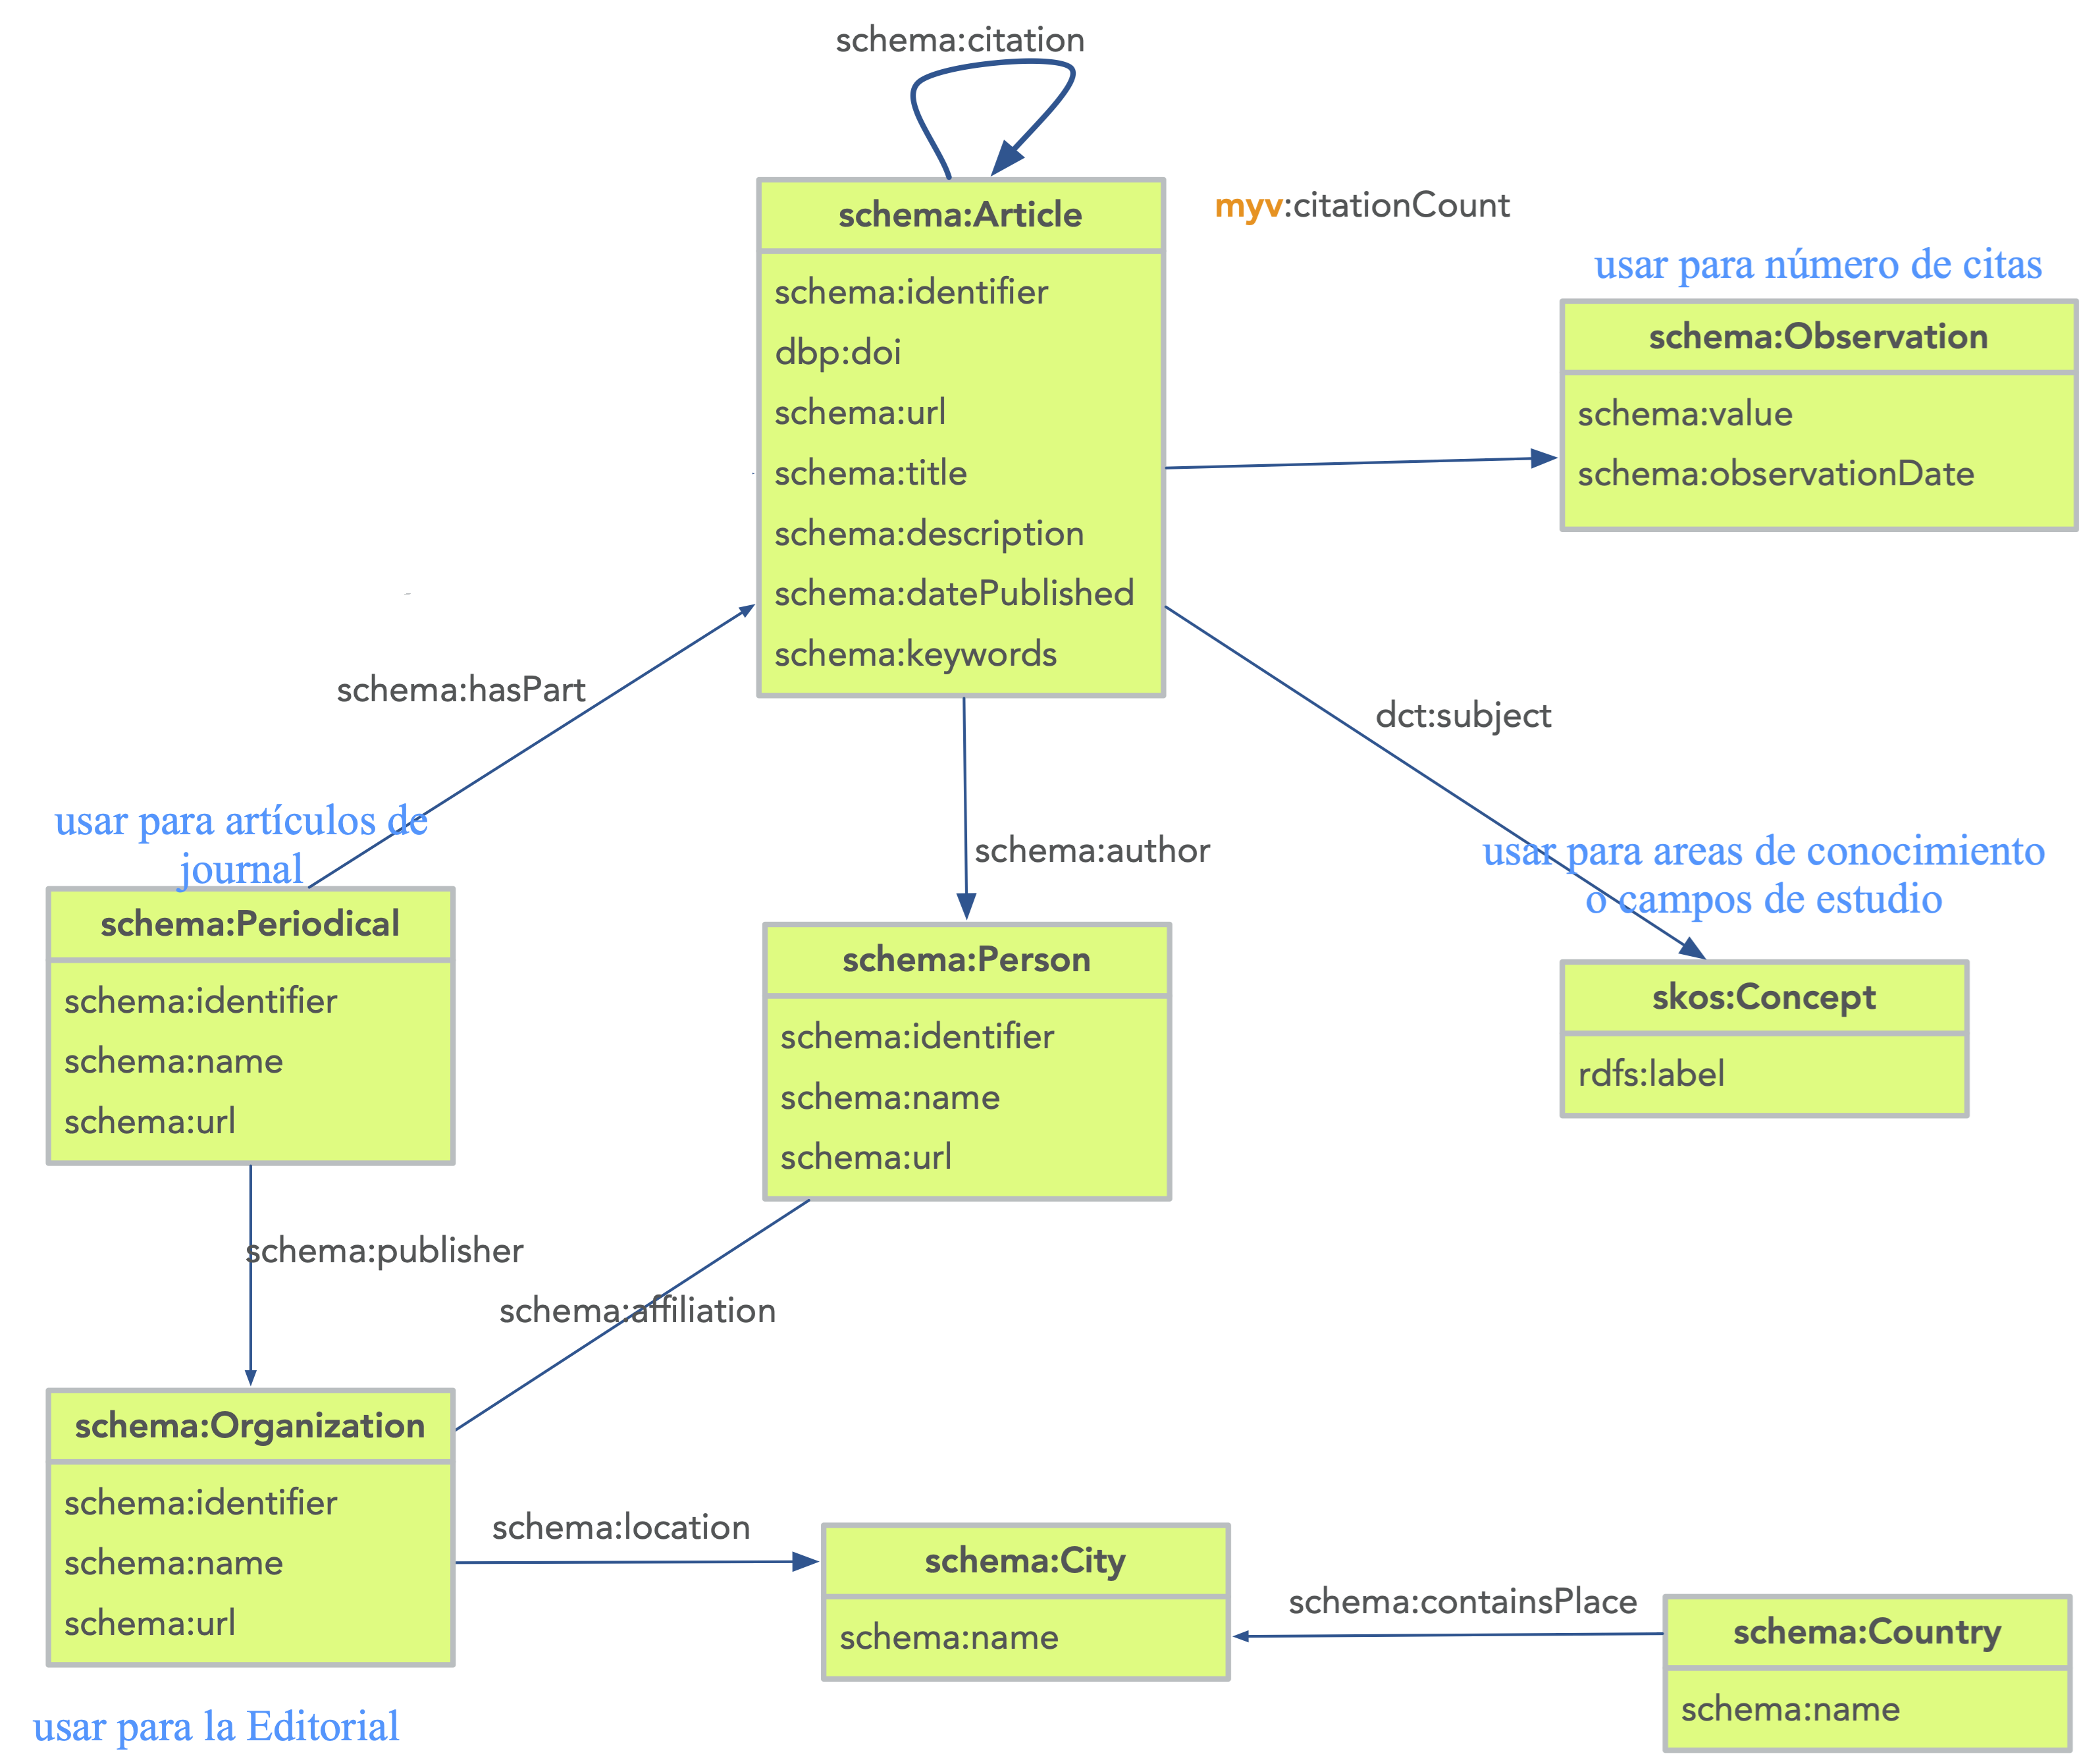

In [24]:
# Retrieve the model as the reference for transformation
from IPython.display import Image

# Specify the path to your image file
image_path = 'model.png'

# Display the image
Image(filename=image_path,width=500)

# Consultas para verificar las relaciones y validez del modelo




### Consulta 1: Listar todos los artículos junto con sus autores
```sparql
SELECT ?article ?title ?author
WHERE {
  ?article a <https://schema.org/Article> ;
           <https://schema.org/title> ?title ;
           <https://schema.org/author> ?author .
}
LIMIT 10
```
**Propósito**: Verificar que los artículos están vinculados a sus autores.

---



In [ ]:
# Specify the path to your image file
image_path = 'model.png'

# Display the image
Image(filename=image_path,width=500)

In [11]:
!jupyter nbconvert --to html scopus_extraction.ipynb

[NbConvertApp] Converting notebook scopus_extraction.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 1507815 bytes to scopus_extraction.html


In [6]:
!jupyter nbconvert --to html Data_Reconciliation.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Data_Reconciliation.ipynb' matched no files
Exception ignored on threading shutdown:
Traceback (most recent call last):
  File "C:\Program Files\Python313\Lib\threading.py", line 1524, in _shutdown
    if _main_thread._handle.is_done() and _is_main_interpreter():
SystemError: <method 'is_done' of '_thread._ThreadHandle' objects> returned a result with an exception set
